In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1 - FFT

In [22]:
def fft_matrix(x: np.ndarray, n): 
    omega = np.cos(2*np.pi/n) - np.sin(2*np.pi/n)*1j
    a = np.arange(0, n, 1)
    matrix = np.outer(a, a)
    fourier_matrix = omega ** matrix
    return fourier_matrix @ x

In [23]:
def inv_fft(y: np.ndarray, n):
    omega = np.cos(2*np.pi/n) - np.sin(2*np.pi/n)*1j
    a = np.arange(0, n, 1)
    matrix = np.outer(a, a)
    fourier_matrix = omega ** matrix
    return np.conj(np.dot(fourier_matrix, np.conj(y)))/n

In [24]:
def permutation(n):
    even = np.arange(0, n, 2)
    odd = np.arange(1, n, 2)
    o = np.hstack((even, odd))
    return np.eye(n)[:, o]

In [70]:
def fft_req(x: np.ndarray, n):
    matrix2 = np.array([[1, 1], [1, -1]])
    p_cashe = {}
    s_cashe = {}
    def req(x: np.ndarray, n, omega):
        nonlocal p_cashe, s_cashe
        if n == 2:
            return matrix2 @ x
        else:
            if n not in p_cashe.keys():
                p_cashe[n] = permutation(n)
            p = p_cashe[n].T @ x
            if n//2 not in s_cashe.keys():
                s_cashe[n//2] = np.diag(omega ** np.arange(0, n//2, 1))
            scale = s_cashe[n//2]
            top = req(p[:n//2], n//2, omega ** 2)
            bottom = req(p[n//2:], n//2, omega ** 2)
            stack = np.vstack(
                (
                    top + (scale @ top),
                    bottom + (-scale @ bottom)
                )
            )
            return p_cashe[n] @ stack
    return req(x, n, np.cos(2*np.pi/n) - np.sin(2*np.pi/n)*1j)

In [68]:
def gen_test(n):
    t = np.zeros(n)
    range = np.arange(n)
    t[n/4<range] = 1
    t[range>3*n/4] = 0
    return t[:, None]

In [73]:
import time

In [83]:
my_times = []
bilb_times = []
for i in range(4,14):
    test = gen_test(2 ** i)
    s1 = time.time()
    my1 = fft_req(test, 2 ** i)
    e1 = time.time()
    my_times.append(e1 - s1)
    s2 = time.time()
    bilb = np.fft.fft(test, 2 ** i)
    e2 = time.time()
    bilb_times.append(e2 - s1)

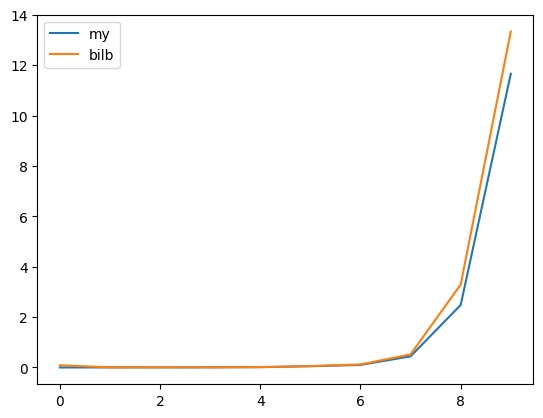

In [80]:
plt.plot(my_times, label = "my")
plt.plot(bilb_times, label = "bilb")
plt.legend()
plt.show()

# Zad 2

In [ ]:
frequencies1 = np.zeros(64)
for i in range(5):
    frequencies1 += np.sin(2*np.pi*i + np.arange(64))

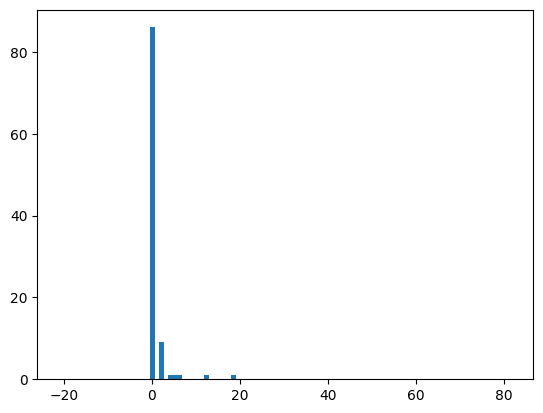

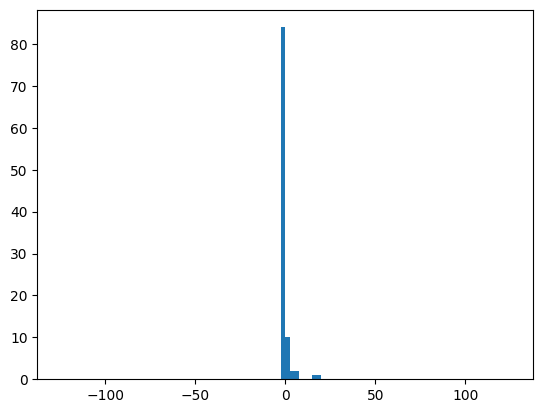

In [89]:
transformed = fft_matrix(frequencies1, 64)
counts, bins = np.histogram(np.real(transformed), bins=100)
plt.hist(counts, bins)
plt.show()
counts, bins = np.histogram(np.imag(transformed), bins=100)
plt.hist(counts, bins)
plt.show()

In [94]:
f2 = np.empty(0)
for i in range(4):
    f2 = np.hstack((f2, np.sin(2*np.pi*i + np.arange(16))))

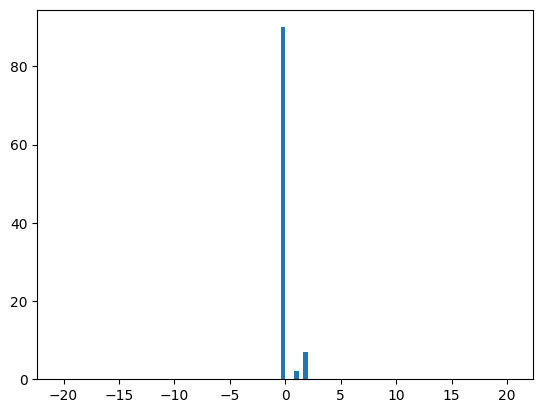

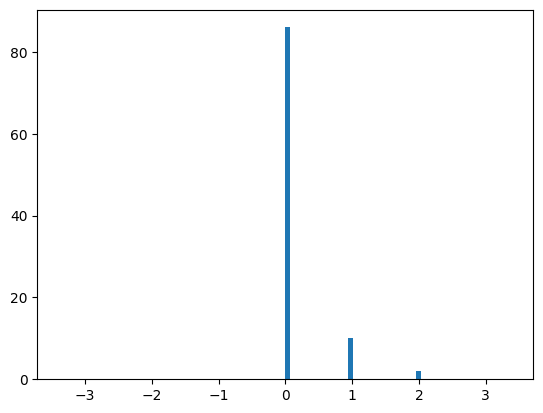

In [95]:
transformed = fft_matrix(f2, 64)
counts, bins = np.histogram(np.real(transformed), bins=100)
plt.hist(counts, bins)
plt.show()
counts, bins = np.histogram(np.imag(transformed), bins=100)
plt.hist(counts, bins)
plt.show()